# SGD Regression (Linear)

[0.1976149  0.14299245]


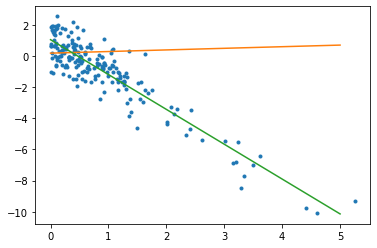

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#np.random.seed(101)

# define error function
def error_w(X, y, w):
    error = np.sum(np.square(y - np.dot(X, w))) / 2.0
    return error

#x[:, None]               # shape: (3, 1) <- 2d (single column matrix)
#x[:, np.newaxis]         # shape: (3, 1) <- a meaningful alias to None
#x.reshape(-1, 1)         # shape: (3, 1)

# set number of points
N = 200

# generate sample data (exponential)
X_sample = np.random.exponential(scale=1.0, size=N)

# generate (oracle) linear target function
y = -2.2 * X_sample + 1 + np.random.randn(N)

plt.plot(X_sample, y, '.')

# create (quadtratic) data matrix
X0 = np.ones(N)
X = np.stack((X0, X_sample), axis=1)

w = np.random.uniform(low=-1, high = 1, size=2)

print(w)

plt.plot([0, 5], [w[0], w[1] * 5])

# set learning rate 0 < eta <= 1
eta = 1e-3

# set mini batch size
batch_size = 10

# set max epochs
max_epochs = 100

# track total error per epoch
total_error = np.zeros(max_epochs + 1)


for epochs in range(max_epochs):
    
    total_error[epochs] = error_w(X, y, w)
    
    # generate random permutation
    rand_perm = np.random.permutation(range(y.shape[0]))
    X = X[rand_perm, :]
    y = y[rand_perm]
    
    # mini-batch learning
    for j in range(0, y.shape[0], batch_size):
        
        X_batch = X[j:(j + batch_size), :]
        
        y_batch = y[j:(j + batch_size)]
        
        errors = y_batch - np.dot(X_batch, w)
        
        w = w + eta * np.dot(np.transpose(X_batch), errors)    




# plot points
#plt.plot(X_sample, y, '.')

# generate grid of points
x_grid = np.linspace(0, 5, 100)

# plot line
plt.plot(x_grid, w[0] + x_grid * w[1])

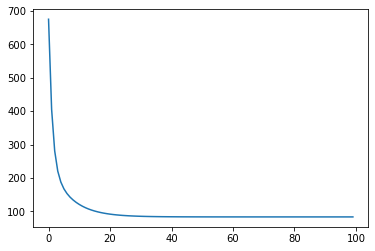

In [2]:
#fig, axs = plt.subplots(1, 2, figsize=(15, 5), sharey=False)
plt.plot(range(sum(total_error > 0)), total_error[total_error > 0])
#fig.suptitle('Categorical Plotting')

# SGD Regression (Polynomial)


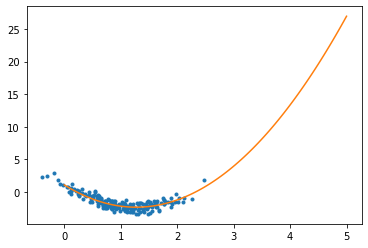

In [11]:
import numpy as np
import matplotlib.pyplot as plt

#np.random.seed(101)

# define error function
def error_w(X, y, w):
    error = np.sum(np.square(y - np.dot(X, w))) / 2.0
    return error

#x[:, None]               # shape: (3, 1) <- 2d (single column matrix)
#x[:, np.newaxis]         # shape: (3, 1) <- a meaningful alias to None
#x.reshape(-1, 1)         # shape: (3, 1)

# set number of points
N = 200

# generate sample data (exponential)
#X = np.random.exponential(scale=1.0, size=N)
X_sample = np.random.normal(loc = 1, scale=.5, size=N)

# generate (oracle) quadratic target function
y = 2 * X_sample**2 - 5.2 * X_sample + 1 + np.random.normal(scale = 0.5, size=N)

# create (quadtratic) data matrix
X0 = np.ones(N)
X = np.stack((X0, X_sample, X_sample**2), axis=1)

# plot points
plt.plot(X_sample, y, '.')


w = np.random.uniform(low=-1, high = 1, size=3)

# set learning rate 0 < eta <= 1
eta = 1e-3

# set mini batch size
batch_size = 10

# set max epoch
max_epochs = 2000

# track total error per epoch
total_error = np.zeros(max_epochs + 1)


for epochs in range(max_epochs):
    
    total_error[epochs] = error_w(X, y, w)
    
    # generate random permutation
    rand_perm = np.random.permutation(range(y.shape[0]))
    X = X[rand_perm, :]
    y = y[rand_perm]
    
    # mini-batch learning
    for j in range(0, y.shape[0], batch_size):
        
        X_batch = X[j:(j + batch_size), :]
        
        y_batch = y[j:(j + batch_size)]
        
        errors = y_batch - np.dot(X_batch, w)
        
        w = w + eta * np.dot(np.transpose(X_batch), errors)    


# generate grid of points
x_grid = np.linspace(0, 5, 100)

# plot line
plt.plot(x_grid, w[0] + x_grid * w[1] + x_grid**2 * w[2])

In [7]:
error_w(X, y, w)

62.349117281703485

In [12]:
error_w(X, y, w)

27.736726427379324

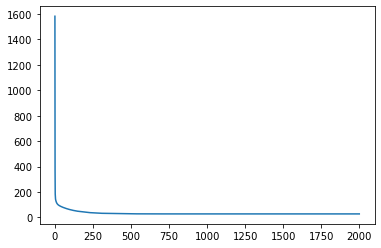

In [13]:
#fig, axs = plt.subplots(1, 2, figsize=(15, 5), sharey=False)
plt.plot(range(sum(total_error > 0)), total_error[total_error > 0])
#fig.suptitle('Categorical Plotting')